In [1]:
import pyclesperanto_prototype as cle
from skimage.io import imread, imshow
import numpy as np
import time

# to measure kernel execution duration properly, we need to set this flag. It will slow down exection of workflows a bit though
cle.set_wait_for_kernel_finish(True)

# selet a GPU with the following in the name. This will fallback to any other GPU if none with this name is found
cle.select_device('AMD')


randomImage = np.random.random((1024,1960))

def selectMatrix(matrixNum=1, scale=0.5) :
    if (matrixNum == 1):
        return np.asarray([
            [scale , 0, 0],
            [0, scale, 0],
            [0, 0, 1]
        ])
    elif (matrixNum == 2):
        return np.asarray([
            [0.70710677 , 0.70710677, 0],
            [-0.70710677, 0.70710677, 0],
            [0, 0, 1]
        ])
    elif (matrixNum == 3):
        return np.asarray([
            [scale , 0, 0, 0],
            [0, scale, 0, 0],
            [0, 0, scale, 0],
            [0, 0, 0, 1]
        ])

C:\Users\hkalo\miniconda3\envs\hpp\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


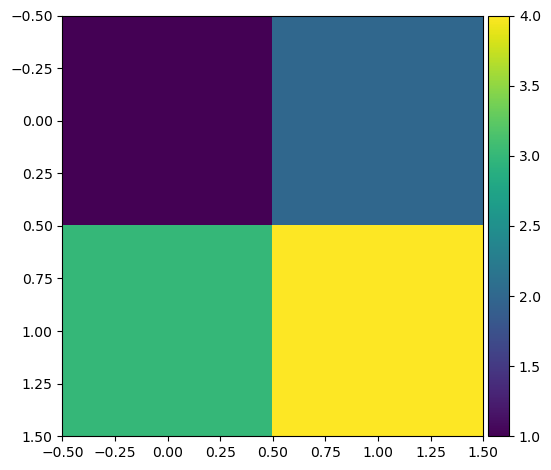

In [2]:
# Create image
# image = np.asarray([[1,2,3],[4,5,6],[7,8,9]])
image = np.asarray([[1,2],[3,4]])
# image = np.asarray([[1,1],[2,2]])
imshow(image)
# image

Executing affine_transform_2d_x.cl


C:\Users\hkalo\miniconda3\envs\hpp\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


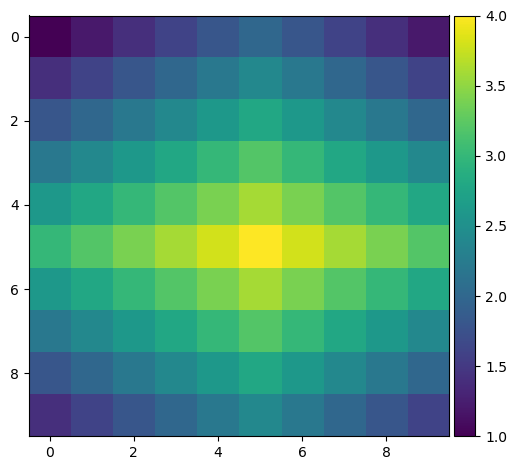

In [3]:
# Transform with scale 5
matrix = selectMatrix(1,5) #scaling
# matrix = selectMatrix(2) #rotation
result1 = cle.create((10,10))
cle.affine_transform(image, result1, transform = matrix)
imshow(result1)

Executing affine_transform_2d_interpolate_x.cl


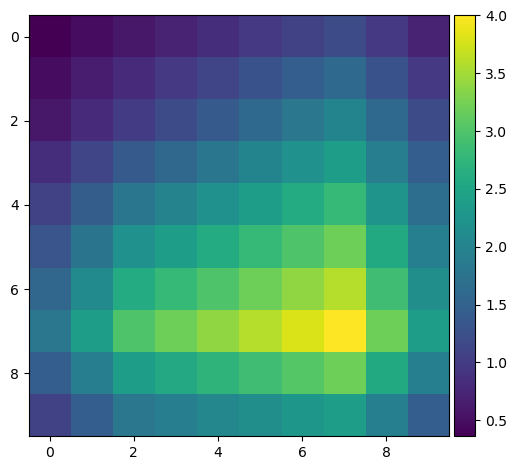

In [4]:
# Scaling with factor 5
matrix = selectMatrix(1,5)
result2 = cle.create((10,10))
cle.affine_transform(image, result2, transform = matrix, linear_interpolation=True)
imshow(result2)

In [5]:
cle.mean_squared_error(result1, result2)

0.6889859771728516

Executing affine_transform_2d_x.cl


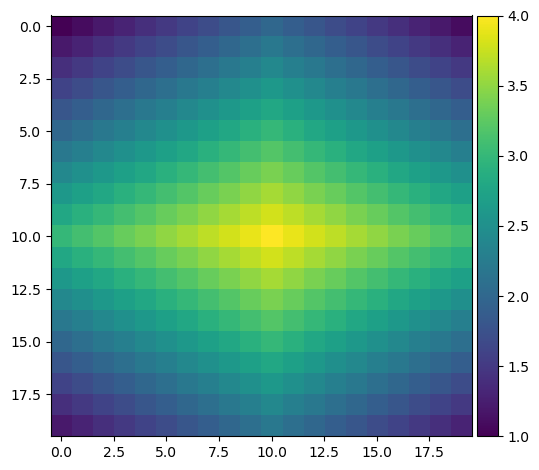

In [6]:
# Scaling with factor 10
matrix = selectMatrix(1,10)
result3 = cle.create((20,20))
cle.affine_transform(image, result3, transform = matrix)
imshow(result3)

Executing affine_transform_2d_interpolate_x.cl


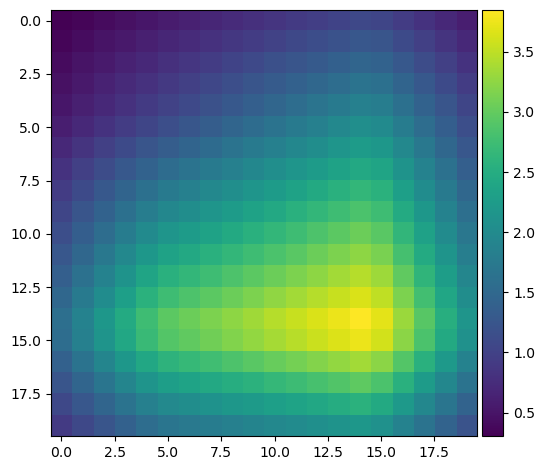

In [7]:
# Transform with scale 10
matrix = selectMatrix(1,10)
result4 = cle.create((20,20))
cle.affine_transform(image, result4, transform = matrix, linear_interpolation=True)
imshow(result4)

In [8]:
cle.mean_squared_error(result3, result4)

0.7908102416992188

Executing affine_transform_2d_x.cl


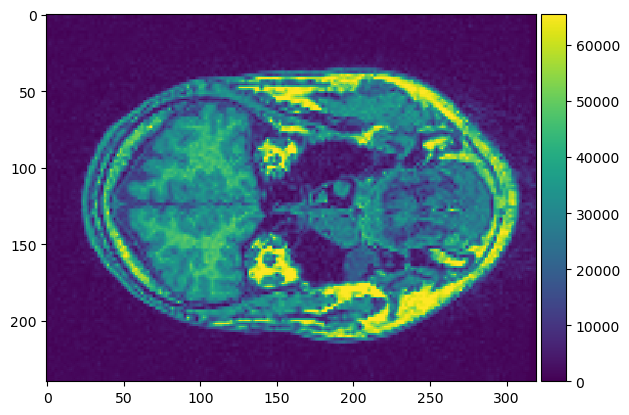

In [9]:
simage = imread('../../data/Haase_MRT_tfl3d1.tif')
matrix = selectMatrix(1,2)
scaleRes1 = cle.create((simage.shape[0]*2,simage.shape[1]*2))
cle.affine_transform(simage[:,:,50], scaleRes1, transform = matrix)
imshow(scaleRes1)

Executing affine_transform_2d_interpolate_x.cl


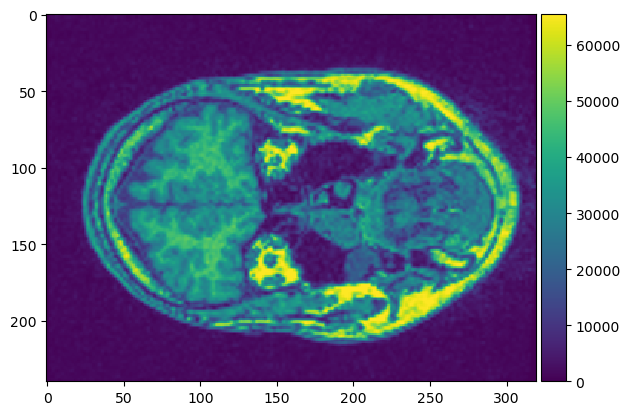

In [10]:
simage = imread('../../data/Haase_MRT_tfl3d1.tif')
matrix = selectMatrix(1,2)
scaleRes2 = cle.create((simage.shape[0]*2,simage.shape[1]*2))
cle.affine_transform(simage[:,:,50], scaleRes2, transform = matrix, linear_interpolation=True)
imshow(scaleRes2)

In [11]:
cle.mean_squared_error(scaleRes1, scaleRes2)

9834578.773333333

In [ ]:
# Rotate with 45
simage = imread('../../data/Haase_MRT_tfl3d1.tif')
matrix = selectMatrix(2)
rotRes1=cle.affine_transform(simage[:,:,50], transform=matrix)
imshow(rotRes1)

In [ ]:
# Rotate with 45
simage = imread('../../data/Haase_MRT_tfl3d1.tif')
matrix = selectMatrix(2)
rotRes2=cle.affine_transform(simage[:,:,50], transform=matrix, linear_interpolation=True)
imshow(rotRes2)

In [ ]:
cle.mean_squared_error(rotRes1, rotRes2)

In [ ]:
transform = cle.AffineTransform3D()
transform.rotate(0,45)

image = imread('../../data/Haase_MRT_tfl3d1.tif')
# # image = imread('../../data/membranes.tif')
cle.affine_transform(image, transform=transform, auto_size=True)
# cle.rotate(image, angle_around_x_in_degrees=45, linear_interpolation=True)
# # cle.scale(image,factor_x=0.5,factor_y=0.5, linear_interpolation=True)

In [ ]:
matrix = selectMatrix(1)
# image = imread('../../data/Haase_MRT_tfl3d1.tif')
image = imread('../../data/membranes.tif')
# cle.affine_transform(image, transform=transform)
cle.affine_transform(image, transform=matrix)

In [ ]:
matrix = selectMatrix(1)

# threeDImage = imread('../../data/Haase_MRT_tfl3d1.tif')
# image = threeDImage[70]

image = imread('../../data/membranes.tif')
s=0.5
output_shape = tuple((np.asarray(image.shape) / s).astype(int))
ocl_image = cle.push(image)
ocl_scaled = cle.create(output_shape)
for i in range(0, 10):
    start_time = time.time()
    cle.affine_transform(ocl_image, ocl_scaled, transform=np.linalg.inv(matrix))
    # cle.affine_transform(ocl_image, ocl_scaled, transform=np.linalg.inv(matrix), linear_interpolation=True)
    print("clEsperanto affine transform duration: " + str(time.time() - start_time))

result = cle.pull(ocl_scaled)
imshow(result)

In [ ]:
s = 0.5
matrix = selectMatrix(1)
threeDImage = imread('../../data/Haase_MRT_tfl3d1.tif')
image = threeDImage[70]
# image = imread('../../data/membranes.tif')
output_shape = tuple((np.asarray(image.shape) / s).astype(int))
ocl_image = cle.push(image)
ocl_scaled = cle.create(output_shape)
for i in range(0, 10):
    start_time = time.time()
    cle.affine_transform(ocl_image, ocl_scaled, transform=np.linalg.inv(matrix), linear_interpolation=True)
    print("clEsperanto affine transform duration: " + str(time.time() - start_time))

result = cle.pull(ocl_scaled)
imshow(result)

In [ ]:
image = imread('../../data/Haase_MRT_tfl3d1.tif')
# image = imread('../../data/membranes.tif')
cle.rotate(image, angle_around_z_in_degrees=45)
# cle.scale(image,factor_x=0.5,factor_y=0.5)

In [ ]:
s = 2
matrix = selectMatrix(3)

image = np.asarray([[1,2],[3,4]])
cle.affine_transform(image, transform = matrix, auto_size=True)
# cle.rotate(image, angle_around_z_in_degrees=90)